<a href="https://colab.research.google.com/github/joaopauloev/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_de_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<center><img alt="Montreal" width="70%" src="https://i.imgur.com/4Mzf7hr.jpg"></center>

# Análise dos Dados do Airbnb - *Montreal*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Montreal, é a maior cidade da província de Quebec, no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Amo viajar!!! Felizmente um grande amigo está no Canadá, vou visitá-lo próximo ano e aproveitei para unir o útil ao agradável. 
Obtive todos os dados usados a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) com desejo de encontrar a melhor hospedagem custo benefício para viagem.

Para essa analíse exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Montreal (good for visualisations).*

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2020-10-19/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso ***dataset***, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,38,2,245,2018-09-23,2.20,1,294
1,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,91,2,329,2020-09-18,2.61,2,349
2,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,163,2,68,2020-09-23,0.64,2,339
3,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,40,2,153,2020-01-07,1.22,5,365
4,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,135,4,4,2011-09-12,0.03,1,358


##### Notamos que o campo `neighbourhood_group`apresenta somente valores nulos nas primeiras 5 entradas. Iremos avaliar todos as entradas desse campo na **Q2**.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este ***dataset*** que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` existe uma versão mais completa [(`listings.csv.gz`)](http://data.insideairbnb.com/canada/qc/montreal/2020-10-19/data/listings.csv.gz).

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 13594
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um ***dataset*** está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos abaixo  de 25% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,05% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.223481
last_review                       0.223481
name                              0.000588
host_name                         0.000221
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

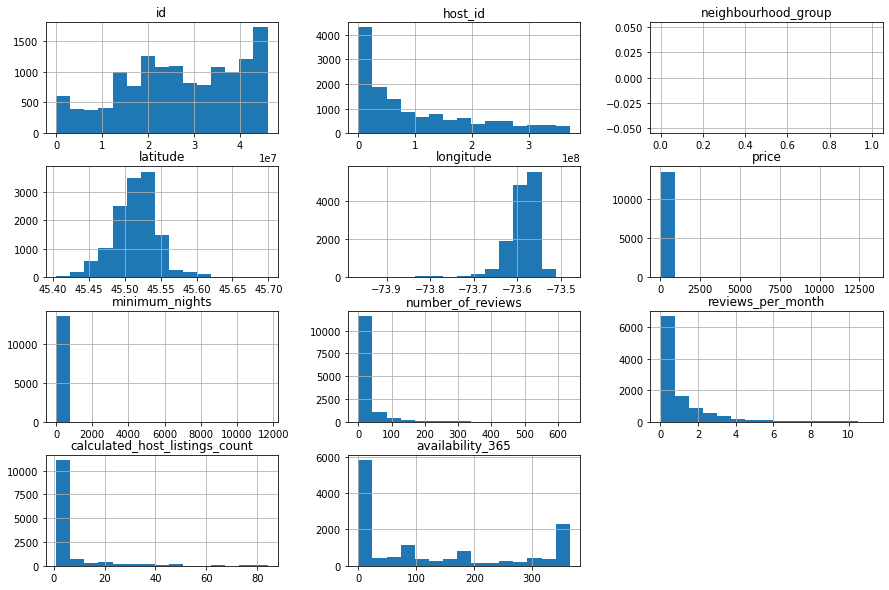

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13594.000000,13594.000000,13594.000000,10556.000000,13594.000000,13594.000000
mean,115.230837,13.831911,21.477490,0.959714,6.141092,126.555024
std,267.527589,107.232998,45.429607,1.309491,12.719710,141.233360
min,11.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,48.000000,1.000000,1.000000,0.140000,1.000000,0.000000
50%,77.000000,2.000000,4.000000,0.410000,1.000000,75.000000
75%,119.000000,7.000000,20.000000,1.230000,4.000000,264.000000
max,13294.000000,11684.000000,636.000000,11.250000,84.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de $119 dólares canadenses, porém, seu valor máximo é 13.294!
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


### Boxplot para price

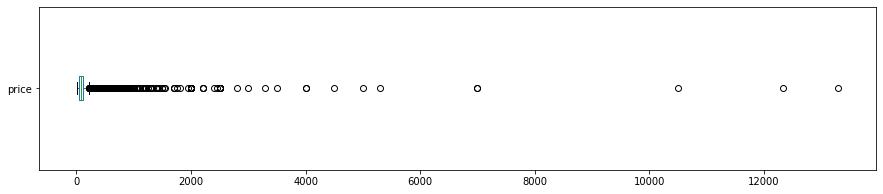


price: valores acima de 1500
46 entradas
0.3384%


In [10]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

### Boxplot para minimum_nights

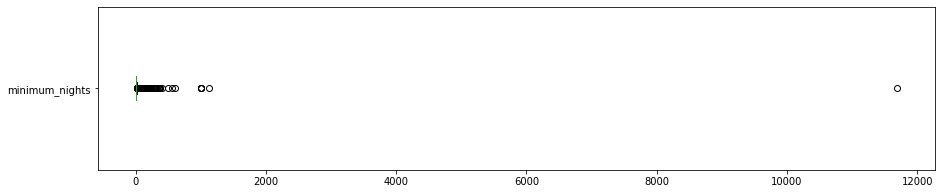

minimum_nights: valores acima de 30:
1722 entradas
12.6674%


In [13]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

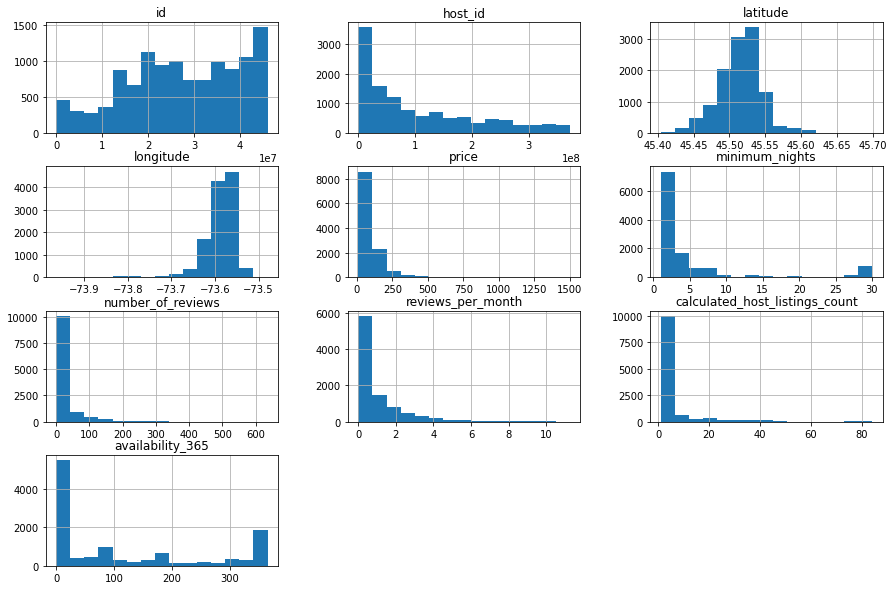

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.044932,-0.000483,-0.012248,0.020024,0.122558
minimum_nights,-0.044932,1.000000,-0.055197,-0.105319,0.172350,0.110563
number_of_reviews,-0.000483,-0.055197,1.000000,0.729904,0.011084,0.112288
reviews_per_month,-0.012248,-0.105319,0.729904,1.000000,0.134065,0.148002
calculated_host_listings_count,0.020024,0.172350,0.011084,0.134065,1.000000,0.202232
availability_365,0.122558,0.110563,0.112288,0.148002,0.202232,1.000000


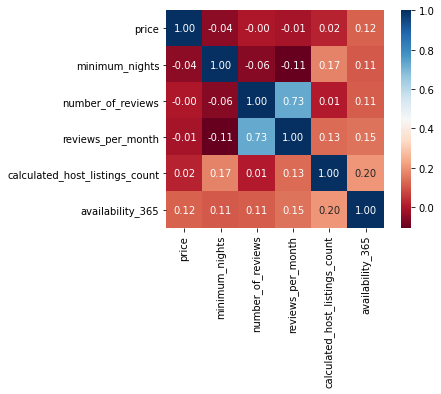

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8113
Private room       3548
Shared room         110
Hotel room           61
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.685683
Private room       0.299865
Shared room        0.009297
Hotel room         0.005156
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Montreal?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. Ao calcular as médias de preços por localidade (neighbourhood) e ordenando de maior para menor, podemos analisar quais bairros são os mais caros para alugar um imóvel no Airbnb em Montreal.


In [19]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Baie-d'Urfé                      662.750000
Côte-Saint-Luc                   225.545455
Hampstead                        220.600000
L'Île-Bizard-Sainte-Geneviève    166.200000
Beaconsfield                     153.500000
Westmount                        144.833333
Dollard-des-Ormeaux              134.351351
Outremont                        126.423358
Montréal-Ouest                   123.153846
Ville-Marie                      120.925198
Name: price, dtype: float64

Acima, temos as informações que os bairros Baie-d'Urfé, Côte-Saint-Luc e Hampstead são os mais caros, porém, uma pessoa que não conhece Montreal poderia viajar com esses resultados sem se questionar mas muitas vezes uma amostra de dados não condiz com a realidade.



In [34]:
# ver quantidade de imóveis em Baie-d'Urfé
print('Quantidade de imóveis para alugar em Baie-d\'Urfé: {}\n'.format(df_clean[df_clean.neighbourhood == "Baie-d'Urfé"].shape[0]))

# ver quantidade de imóveis em Côte-Saint-Luc
print('Quantidade de imóveis para alugar em Côte-Saint-Luc: {}\n'.format(df_clean[df_clean.neighbourhood == "Côte-Saint-Luc"].shape[0]))

# ver quantidade de imóveis em Hampstead
print('Quantidade de imóveis para alugar em Hampstead: {}\n'.format(df_clean[df_clean.neighbourhood == "Hampstead"].shape[0]))

# ver as 4 entradas de Baie-d'Urfé
df_clean[df_clean.neighbourhood == "Baie-d'Urfé"]

Quantidade de imóveis para alugar em Baie-d'Urfé: 4

Quantidade de imóveis para alugar em Côte-Saint-Luc: 44

Quantidade de imóveis para alugar em Hampstead: 10



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
54,211602,Beautiful sun-filled Studio,407029,Hans,Baie-d'Urfé,45.41419,-73.90768,Entire home/apt,70,2,159,2019-08-20,1.87,1,291
760,4180573,Serenity dream in Montreal Quebec......,21688243,Simin,Baie-d'Urfé,45.41190,-73.91085,Entire home/apt,1169,7,0,NaN,NaN,2,365
4978,21829593,Seize the Day in Montreal.........,21688243,Simin,Baie-d'Urfé,45.41198,-73.90999,Entire home/apt,1312,7,0,NaN,NaN,2,365
6347,25783067,Two-bedroom studio with simple breakfast & pool,41285013,Wendy,Baie-d'Urfé,45.41477,-73.90432,Entire home/apt,100,30,39,2019-08-29,1.37,1,75


Como são fornecidas as Latitudes(`latitude`) e Longitudes (`longitude`) para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

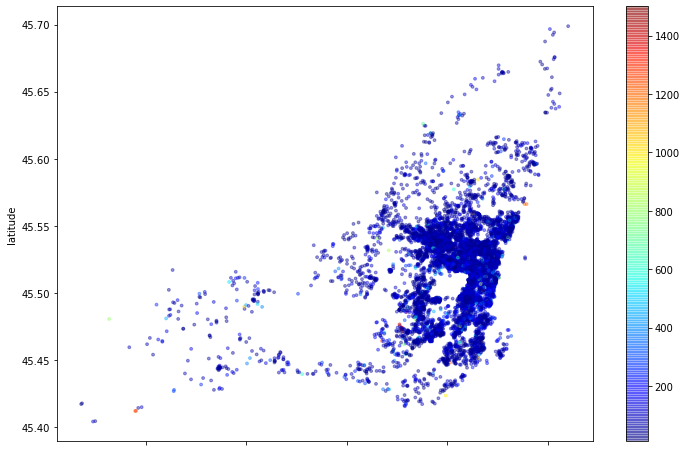

In [35]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Nota-se que os pontos formados no gráfico é bem simular a área de Montreal. O mapa é perceptível visualizar o Lake Saint-Louis, um lago no sudoeste de Quebec, no Canadá.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb de Montreal, porém já se percebeu que existem *outliers* em algumas das variáveis e analisamos diversas informações importantes. 

Notamos com $50 à 200 dólares canadenses, podemos ter hospedagem mínima de noites com 1 a 5 dependendo do bairro.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completo.